# Цель.
Изучить различные методы отбора наилучших моделей машинного обучения и их применение для улучшения производительности и интерпретируемости моделей.

# Изучение методов отбора признаков.
Ознакомьтесь с различными методами отбора признаков, такими как отбор признаков на основе важности, рекурсивное исключение признаков (Recursive Feature Elimination, RFE) и методы отбора признаков на основе моделей.


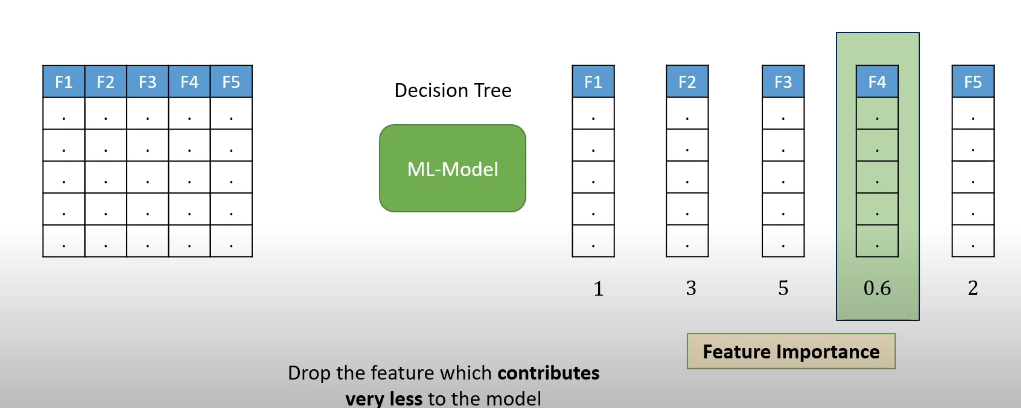

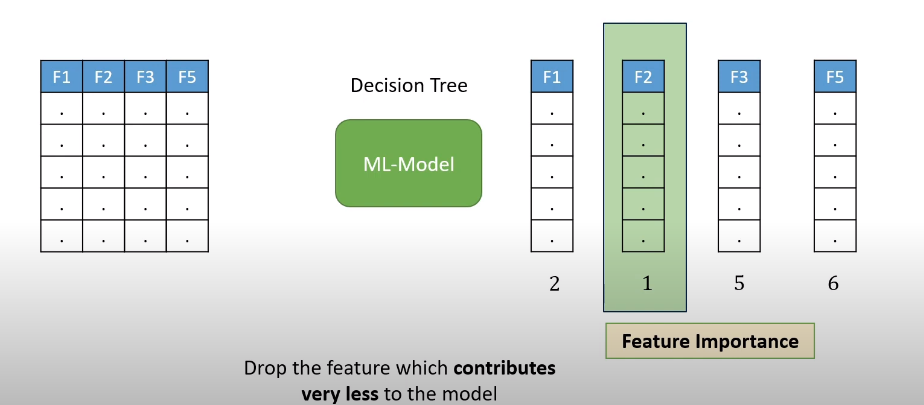

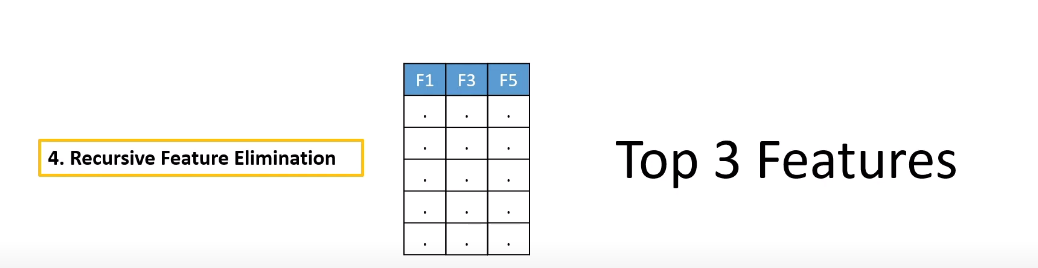

In [2]:
import pandas as pd
import numpy as np

# Импорт данных из CSV-файла
data = pd.read_csv('sales.csv')
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Azerbaijan,Snacks,Online,C,10/8/2014,535113847,10/23/2014,934,152.58,97.44,142509.72,91008.96,51500.76
1,Central America and the Caribbean,Panama,Cosmetics,Offline,L,2/22/2015,874708545,2/27/2015,4551,437.20,263.33,1989697.20,1198414.83,791282.37
2,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,M,12/9/2015,854349935,1/18/2016,9986,9.33,6.92,93169.38,69103.12,24066.26
3,Sub-Saharan Africa,Sao Tome and Principe,Personal Care,Online,M,9/17/2014,892836844,10/12/2014,9118,81.73,56.67,745214.14,516717.06,228497.08
4,Central America and the Caribbean,Belize,Household,Offline,H,2/4/2010,129280602,3/5/2010,5858,668.27,502.54,3914725.66,2943879.32,970846.34


In [3]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, 8:14]
y = data.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
y_train

75220                                 Asia
48955                               Europe
44966                                 Asia
13568                               Europe
92727                               Europe
                       ...                
6265                                Europe
54886                                 Asia
76820    Central America and the Caribbean
860                     Sub-Saharan Africa
15795                   Sub-Saharan Africa
Name: Region, Length: 80000, dtype: object

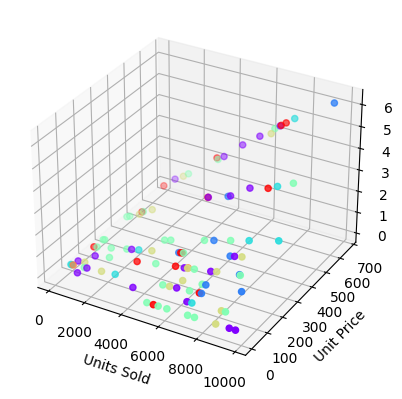

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

x1 = y_train[:100]
y1= X_train['Units Sold'][:100]
y2= X_train['Unit Price'][:100]
z= X_train['Total Revenue'][:100]

# Преобразуем значения x1 в числовые метки
label_encoder = LabelEncoder()
x1_encoded = label_encoder.fit_transform(x1)

# Создаем трехмерный график
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y1, y2, z, c=x1_encoded, cmap='rainbow')

# Настройка осей и меток
ax.set_xlabel('Units Sold')
ax.set_ylabel('Unit Price')
ax.set_zlabel('Total Revenue')

# Отображение графика
plt.show()

In [6]:
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

x1 = y_train[:100]
y1 = X_train['Units Sold'][:100]
y2 = X_train['Unit Price'][:100]
z = X_train['Total Revenue'][:100]

# Преобразуем значения x1 в числовые метки
label_encoder = LabelEncoder()
x1_encoded = label_encoder.fit_transform(x1)

# Создаем трехмерный график
fig = go.Figure(data=[go.Scatter3d(x=y1, y=y2, z=z, mode='markers', marker=dict(size=5, color=x1_encoded, colorscale='Rainbow'))])

# Настройка осей и меток
fig.update_layout(scene=dict(xaxis_title='Units Sold', yaxis_title='Unit Price', zaxis_title='Total Revenue'))

# Отображение графика
fig.show()


https://excelbianalytics.com/wp/downloads-18-sample-csv-files-data-sets-for-testing-sales/

100 000 Sales Records

In [7]:
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# Инициализация модели для отбора признаков на основе важности
sfm = SelectFromModel(RandomForestClassifier())
# Применение метода отбора признаков на основе важности к обучающему набору данных
sfm.fit(X_train, y_train)
X_train_selected = sfm.transform(X_train)

Применение методов отбора признаков к модели машинного обучения.
Примените выбранные методы отбора признаков к выбранной модели
машинного обучения.

In [8]:
# Применение метода RFE к модели логистической регрессии
rfe = RFE(LogisticRegression(), n_features_to_select=5)
rfe.fit(X_train, y_train)
X_train_rfe = rfe.transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# Оценка производительности моделей с отобранными признаками.
Оцените производительность моделей машинного обучения с отобранными
признаками на тестовом наборе данных.

In [9]:
# Применение метода отбора признаков на основе важности к тестовому набору данных
X_test_selected = sfm.transform(X_test)

# Применение метода RFE к тестовому набору данных
X_test_rfe = rfe.transform(X_test)

# Обучение модели на отобранных признаках
model = LogisticRegression()
model.fit(X_train_selected, y_train)

# Оценка производительности модели на тестовом наборе данных
accuracy = model.score(X_test_selected, y_test)
accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.2583

# Сравнение с базовой моделью.
Сравните производительность моделей с отобранными признаками с производительностью базовой модели, обученной на всех признаках.

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression

# Применение метода отбора признаков к обучающему набору данных
selector = SelectKBest(score_func=chi2, k=6)
X_train_selected = selector.fit_transform(X_train, y_train)

# Применение метода отбора признаков к тестовому набору данных
X_test_selected = selector.transform(X_test)

# Обучение базовой модели на всех признаках
baseline_model = LogisticRegression(max_iter=10000)
baseline_model.fit(X_train, y_train)
# Оценка производительности базовой модели на тестовом наборе данных
baseline_accuracy = baseline_model.score(X_test, y_test)
baseline_accuracy

0.2614

1. Исследуйте влияние различных методов отбора признаков на
производительность моделей и их интерпретируемость.



In [11]:
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV


X = data.iloc[:2000, 8:14]
y = data.iloc[:2000, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

# Инициализация модели для отбора признаков на основе важности
sfm = SelectFromModel(RandomForestClassifier())
# Применение метода отбора признаков на основе важности к обучающему набору данных
sfm.fit(X_train, y_train)
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Применение метода RFE к модели логистической регрессии
rfe = RFE(LogisticRegression(max_iter=1000, solver='liblinear'), n_features_to_select=2)
rfe.fit(X_train, y_train)
X_train_rfe = rfe.transform(X_train)

# Оценка производительности моделей с отобранными признаками на тестовом наборе данных
# Обучение модели на отобранных признаках
model.fit(X_train_selected, y_train)
# Оценка производительности модели на тестовом наборе данных
accuracy = model.score(X_test_selected, y_test)

# Сравнение с базовой моделью
# Обучение базовой модели на всех признаках
baseline_model = LogisticRegressionCV(max_iter=1000)
baseline_model.fit(X_train, y_train)
# Оценка производительности базовой модели на тестовом наборе данных
baseline_accuracy = baseline_model.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

In [12]:
print('accuracy: %0.2f, baseline_accuracy: %0.2f' % (accuracy, baseline_accuracy))

accuracy: 0.28, baseline_accuracy: 0.27


2. Реализуйте сравнительный анализ различных алгоритмов отбора
признаков.

1.   mRMR (minimum Redundancy Maximum Relevance): Этот алгоритм отбирает признаки, которые имеют максимальную взаимную информацию с целевой переменной и минимальную взаимную информацию между собой. Он может быть полезен для устранения избыточности и повышения различимости признаков.
2.   Методы фильтрации: Эти методы оценивают важность признаков независимо от модели машинного обучения. Они основаны на статистических метриках, таких как информационный выигрыш или квадратичный тест. Примеры включают в себя методы, доступные в библиотеке scikit-feature.
3.   Методы вложений: Эти методы используют модели машинного обучения для оценки важности признаков. Примеры включают в себя методы, такие как Random Forest, LightGBM и другие алгоритмы, которые могут предоставить информацию о важности признаков.
4.   Методы обертывания: Эти методы используют итеративный процесс, в котором модель машинного обучения обучается на различных подмножествах признаков. Примеры включают в себя методы, такие как Recursive Feature Elimination (RFE), который использует модель логистической регрессии для оценки важности признаков.



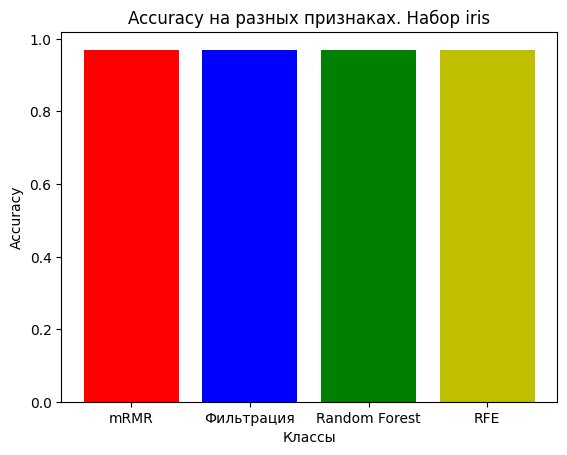

In [13]:
import matplotlib.pyplot as plt

# Данные для графика
x = [1, 2, 3, 4]  # Пример значений x
y = [0.97, 0.97, 0.97, 0.97]  # Пример значений y
classes = ['mRMR', 'Фильтрация', 'Random Forest', 'RFE']  # Названия классов
colors = ['r', 'b', 'g', 'y']  # Цвета для каждой гистограммы

# Создание графика с указанием цветов
plt.bar(classes, y, color=colors)  # Создание столбчатой диаграммы с указанием цветов
plt.xlabel('Классы')  # Название оси x
plt.ylabel('Accuracy')  # Название оси y
plt.title('Accuracy на разных признаках. Набор iris')  # Заголовок графика
plt.show()  # Отображение графика

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Загрузка датасета Iris
iris = load_iris()
X = iris.data
y = iris.target

# Применение mRMR для выбора признаков
selector = SelectKBest(score_func=mutual_info_classif, k=2)
X_new = selector.fit_transform(X, y)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=24)

# Создание и обучение модели логистической регрессии
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Предсказание классов на тестовой выборке
y_pred = logreg.predict(X_test)

# Расчет точности
accuracy = accuracy_score(y_test, y_pred)
print("Точность логистической регрессии на выбранных признаках:", accuracy)

NameError: name 'mutual_info_classif' is not defined

Зависит от данных которые мы возьмем random_state

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

# Загрузка датасета Iris
iris = load_iris()
X = iris.data
y = iris.target

# Применение унивариантного отбора признаков
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=24)

# Создание и обучение модели логистической регрессии
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Предсказание классов на тестовой выборке
y_pred = logreg.predict(X_test)

# Расчет точности
accuracy = accuracy_score(y_test, y_pred)
print("Точность логистической регрессии на выбранных признаках:", accuracy)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Загрузка датасета Iris
iris = load_iris()
X = iris.data
y = iris.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

# Создание и обучение модели логистической регрессии
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Предсказание классов на тестовой выборке
y_pred = rf.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print("Точность на модели на Random Forest:", accuracy)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

rf = RandomForestClassifier()

rfe = RFE(estimator=rf, n_features_to_select=2)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)


rf.fit(X_train_rfe, y_train)


y_pred = rf.predict(X_test_rfe)

accuracy = accuracy_score(y_test, y_pred)
print("Точность на модели Random Forest:", accuracy)